# Instability of forward Euler scheme

Consider the ODE
$$
y' = -5 t y^2 + \frac{5}{t} - \frac{1}{t^2}, \qquad t \ge 1
$$
with initial condition
$$
y(1) = 1
$$
The exact solution is
$$
y(t) = \frac{1}{t}
$$

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Right hand side function

In [8]:
def f(t,y):
    return -5.0*t*y**2 + 5.0/t - 1.0/t**2

Exact solution

In [9]:
def yexact(t):
    return 1.0/t

This implements Euler method
$$
y_n = y_{n-1} + h f(t_{n-1},y_{n-1})
$$

In [10]:
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

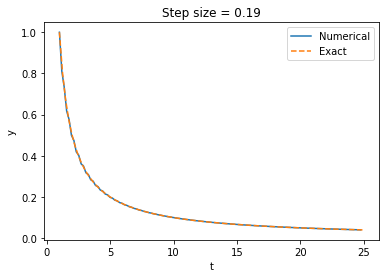

In [11]:
t0 = 1.0
y0 = 1.0
T  = 25.0
h  = 0.19
t,y = euler(t0,T,y0,h)
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h))

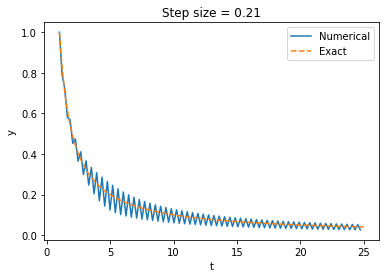

In [12]:
h  = 0.21
t,y = euler(t0,T,y0,h)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h))